In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_cat=pd.read_csv('categorical.csv')

## Processing data

In [3]:
df_cat

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,pacific states,No,Basic,superior education,2/24/11,employed,F,urban,Married,Corporate,A,Agent,standard cars,Medsize
1,mountain states,No,Extended,superior education,1/31/11,unemployed,F,urban,Single,Personal,C,Agent,standard cars,Medsize
2,mountain states,No,Premium,superior education,2/19/11,employed,F,urban,Married,Personal,A,Agent,standard cars,Medsize
3,pacific states,No,Basic,superior education,1/20/11,unemployed,M,urban,Married,Corporate,A,Call Center,standard cars,Medsize
4,pacific states,No,Basic,superior education,2/3/11,employed,M,rural,Single,Personal,A,Agent,standard cars,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,pacific states,No,Basic,superior education,2/10/11,employed,M,urban,Married,Personal,B,Web,standard cars,Medsize
9130,pacific states,Yes,Extended,superior education,2/12/11,employed,F,urban,Divorced,Corporate,A,Branch,standard cars,Medsize
9131,pacific states,No,Extended,superior education,2/6/11,unemployed,M,urban,Single,Corporate,A,Branch,standard cars,Medsize
9132,pacific states,No,Extended,superior education,2/3/11,employed,M,urban,Married,Personal,C,Branch,standard cars,Large


#### Analyzing the variables plots

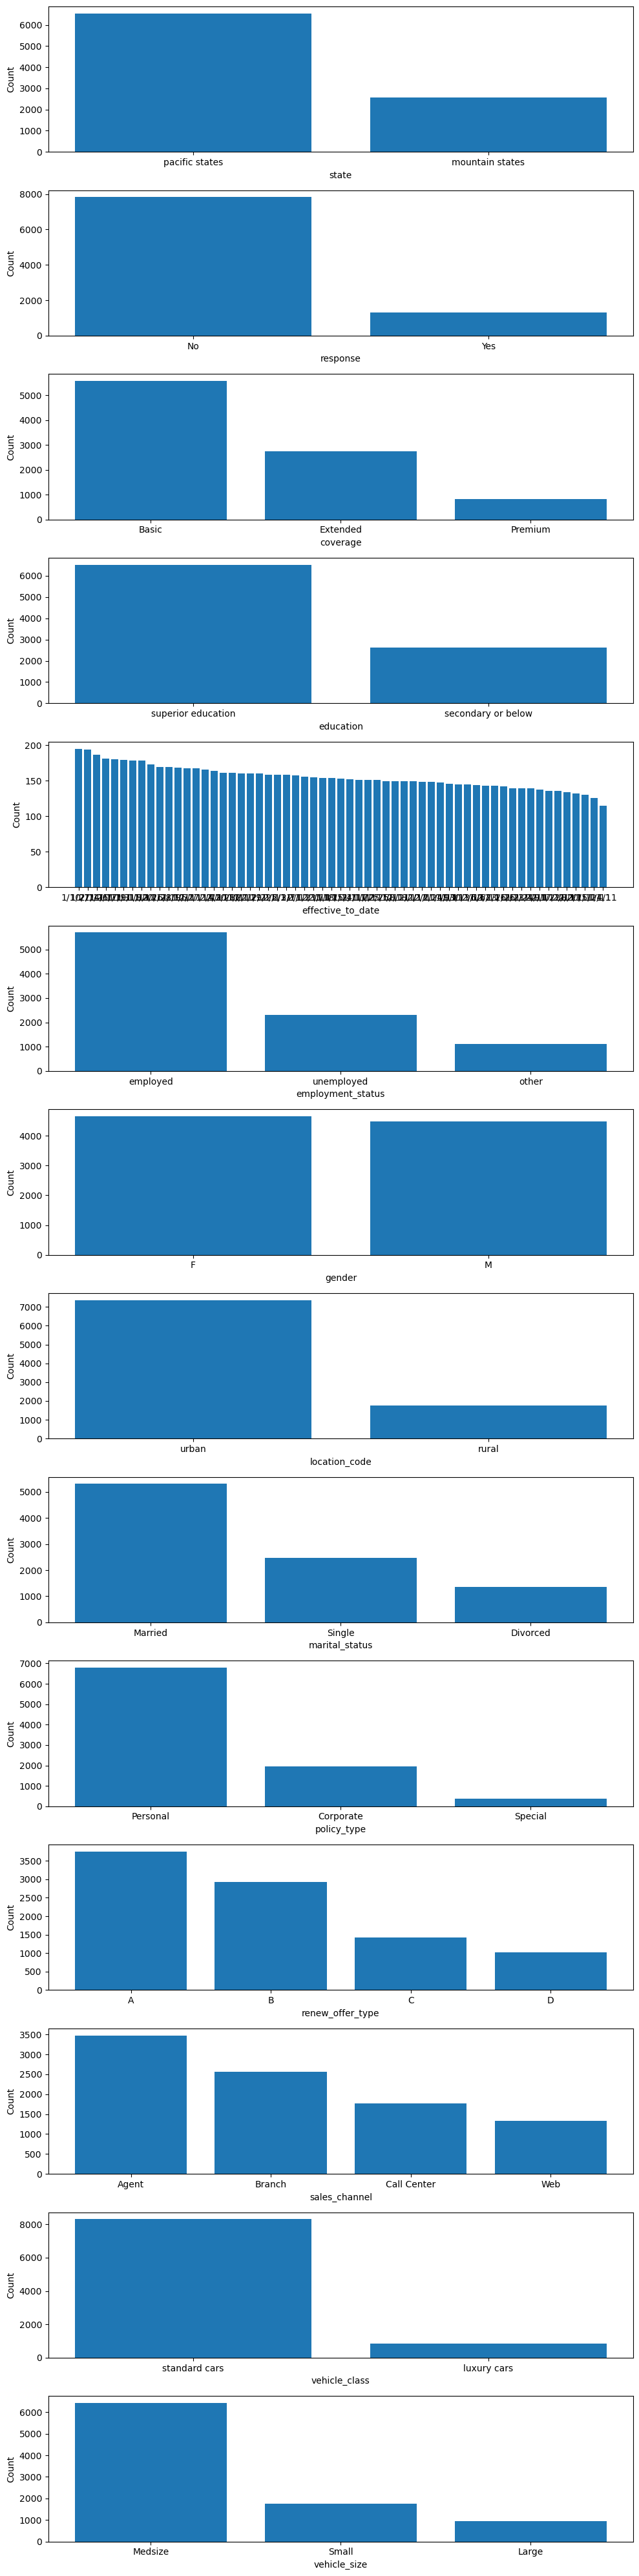

In [4]:
fig, axs = plt.subplots(nrows=14, figsize=(10,40))
for i, col in enumerate(df_cat.columns):
    axs[i].bar(df_cat[col].value_counts().index, df_cat[col].value_counts())
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

> Conclusion on plot: Most of the variables show a distribution skewed to the right. I believe, the redunt columns where eliminated on the first cleaning step already and each column was grouped following a specific and documented logic.

#### Formatting the Date column and ploting it

In [5]:
df_cat['effective_to_date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

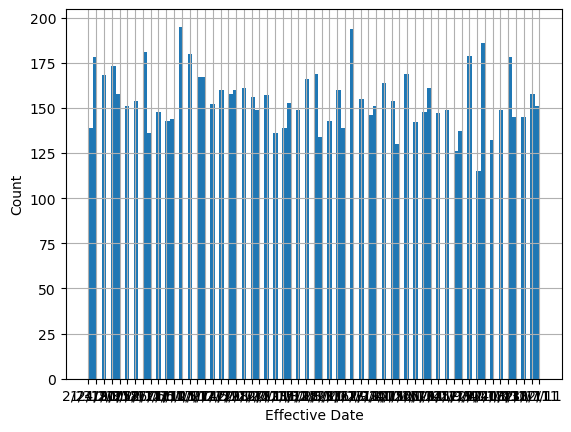

In [6]:
df_cat['effective_to_date'].hist(bins=100)
plt.xlabel('Effective Date')
plt.ylabel('Count')
plt.show()

> Conclusion: Analyzing the distribution of values and checking the plot, it shows the dates corresponds to entries on the months of January and February of 2011. Therefore, makes sense to create a new columns filtered by month and day. 

In [7]:
df_cat['effective_to_date'] = df_cat['effective_to_date'].astype('datetime64[ns]')
df_cat['effective_to_date_month'] = df_cat['effective_to_date'].dt.strftime('%m')
df_cat['effective_to_date_day'] = df_cat['effective_to_date'].dt.strftime('%d')

In [8]:
df_cat



,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date_month,effective_to_date_day
0,pacific states,No,Basic,superior education,2011-02-24,employed,F,urban,Married,Corporate,A,Agent,standard cars,Medsize,02,24
1,mountain states,No,Extended,superior education,2011-01-31,unemployed,F,urban,Single,Personal,C,Agent,standard cars,Medsize,01,31
2,mountain states,No,Premium,superior education,2011-02-19,employed,F,urban,Married,Personal,A,Agent,standard cars,Medsize,02,19
3,pacific states,No,Basic,superior education,2011-01-20,unemployed,M,urban,Married,Corporate,A,Call Center,standard cars,Medsize,01,20
4,pacific states,No,Basic,superior education,2011-02-03,employed,M,rural,Single,Personal,A,Agent,standard cars,Medsize,02,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,pacific states,No,Basic,superior education,2011-02-10,employed,M,urban,Married,Personal,B,Web,standard cars,Medsize,02,10
9130,pacific states,Yes,Extended,superior education,2011-02-12,employed,F,urban,Divorced,Corporate,A,Branch,standard cars,Medsize,02,12
9131,pacific states,No,Extended,superior education,2011-02-06,unemployed,M,urban,Single,Corporate,A,Branch,standard cars,Medsize,02,06
9132,pacific states,No,Extended,superior education,2011-02-03,employed,M,urban,Married,Personal,C,Branch,standard cars,Large,02,03


<AxesSubplot:>

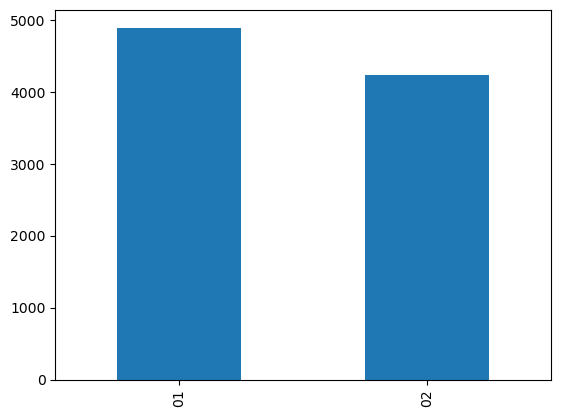

In [9]:
df_cat['effective_to_date_month'].value_counts().plot.bar()

<AxesSubplot:>

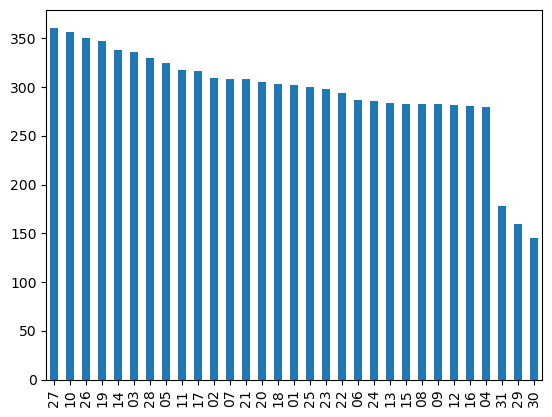

In [10]:
df_cat['effective_to_date_day'].value_counts().plot.bar()

#### Saving on a different file

In [11]:
df_cat.to_csv('categorical_final.csv', index=False)